<a href="https://colab.research.google.com/github/Francisroyce/Francisroyce/blob/main/Malaria_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# Data Preparation

# Data Loading

In [18]:
dataset, dataset_info = tfds.load('malaria', with_info=True,
                                  as_supervised=True,
                                  shuffle_files=True,
                                  split=['train'])

In [10]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [11]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear im

In [12]:
# Specify the dataset name
dataset_name = 'malaria'

# Get the dataset info
dataset_info = tfds.builder(dataset_name).info

# Print the dataset location
print(f"Dataset {dataset_name} is located at: {dataset_info.data_dir}")


Dataset malaria is located at: /root/tensorflow_datasets/malaria/1.0.0


In [13]:
for data in dataset:
  print(data)
  break

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [14]:
for data in dataset[0].take(4):
  print(data)


(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(115, 157, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
       

# creating train val test sets

In [15]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

dataset = tf.data.Dataset.range(10)
print(list(dataset.as_numpy_iterator()))
DATA_SIZE = len(dataset)
print(DATA_SIZE)

train_dataset =dataset.take(int(TRAIN_RATIO*DATA_SIZE))
print(list(train_dataset.as_numpy_iterator()))

val_test_dataset = dataset.skip(int(TRAIN_RATIO*DATA_SIZE))
print(list(val_test_dataset.as_numpy_iterator()))

val_dataset = val_test_dataset.take(int(VAL_RATIO*DATA_SIZE))
print(list(val_dataset.as_numpy_iterator()))

test_dataset = val_test_dataset.skip(int(VAL_RATIO*DATA_SIZE))
print(list(test_dataset.as_numpy_iterator()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
10
[0, 1, 2, 3, 4, 5, 6, 7]
[8, 9]
[8]
[9]


In [19]:
def splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
    DATA_SIZE = len(dataset)
    train_dataset =dataset.take(int(TRAIN_RATIO*DATA_SIZE))
    val_test_dataset = dataset.skip(int(TRAIN_RATIO*DATA_SIZE))
    val_dataset = val_test_dataset.take(int(VAL_RATIO*DATA_SIZE))
    test_dataset = val_test_dataset.skip(int(VAL_RATIO*DATA_SIZE))
    return train_dataset, val_dataset, test_dataset


In [20]:
# dataset = tf.data.Dataset.range(10)
train_dataset, val_dataset, test_dataset = splits(dataset[0], TRAIN_RATIO, VAL_RATIO, TEST_RATIO)
print(list(train_dataset.take(1).as_numpy_iterator()))
print(list(val_dataset.take(1).as_numpy_iterator()))
print(list(test_dataset.take(1).as_numpy_iterator()))


[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)]
[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

In [21]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

# Dataset Visualization

In [22]:
# for i, (image, label) in enumerate(train_dataset.take(16)):
#   ax = plt.subplot(4, 4, i + 1)
#   plt.imshow(image)
#   plt.title(dataset_info.features['label'].int2str(label))

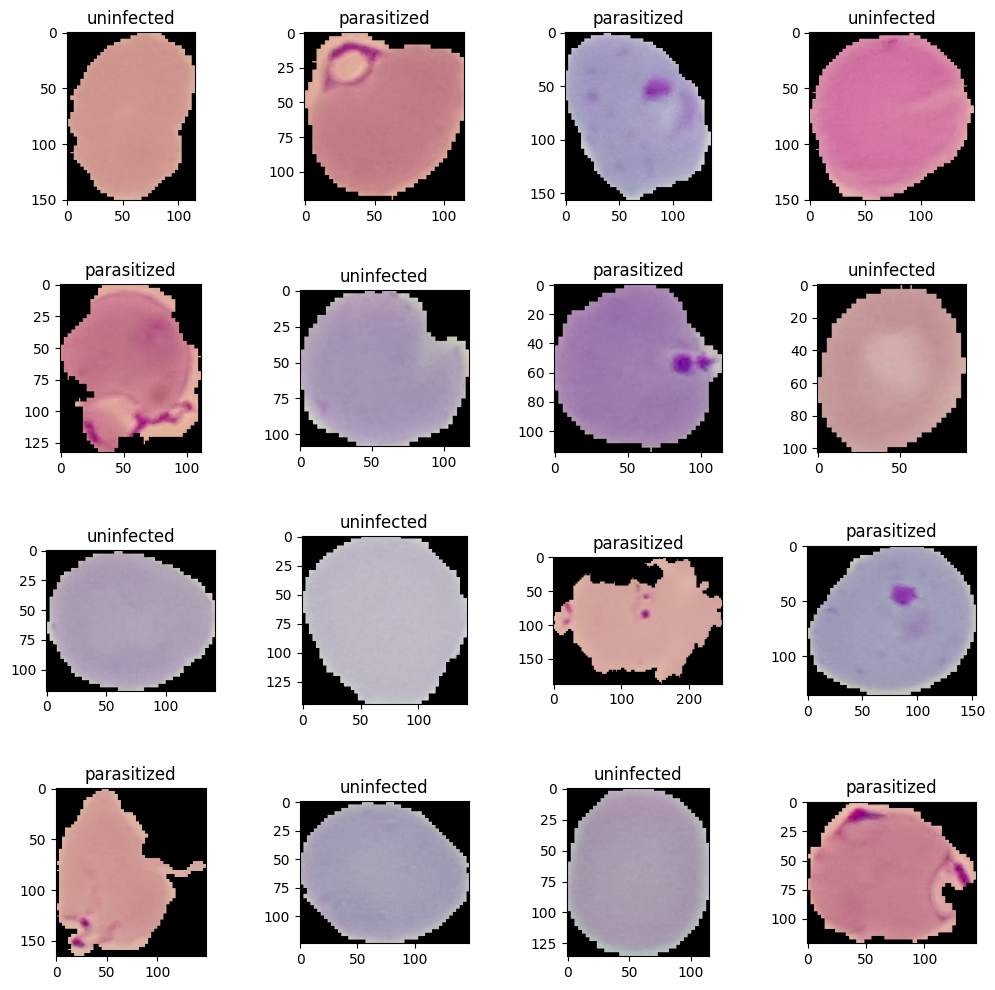

In [23]:
import matplotlib.pyplot as plt

# Define the number of rows and columns for the grid
rows, cols = 4, 4

# Create a figure and adjust the spacing between subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Iterate through the dataset
for i, (image, label) in enumerate(train_dataset.take(16)):
    row, col = i // cols, i % cols
    ax = axes[row, col]

    # Display the image
    ax.imshow(image)

    # Set the title to the label
    ax.set_title(dataset_info.features['label'].int2str(label))

# Hide any empty subplots (if the number of images is less than 16)
for i in range(len(train_dataset), rows * cols):
    row, col = i // cols, i % cols
    axes[row, col].axis('off')

plt.show()


In [24]:
# checking the labels that has 0 and 1
dataset_info.features['label'].int2str(0)

# we can see (0) is paratized

'parasitized'

In [25]:
dataset_info.features['label'].int2str(1)

'uninfected'

In [26]:
# we can see that (1) is uninfected

# Data Processing

In [27]:
# resizing our images
IM_SIZE = 224
def resize_rescale(image, label):
  return tf.image.resize(image, (IM_SIZE, IM_SIZE))/255.0, label

In [28]:
train_dataset = train_dataset.map(resize_rescale)
print(train_dataset)

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [29]:
for image, label in train_dataset.take(1):
  print(image, label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(0, shape=(), dtype=int64)


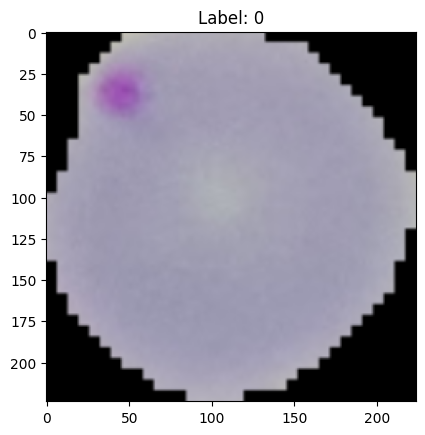

In [30]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the dataset and take one batch (image and label)
for image, label in train_dataset.take(1):
    # Ensure the image data is in the [0, 1] range
    image = tf.image.convert_image_dtype(image, tf.float32)

    # Check the shape of the image; it should be (height, width, channels)
    if image.shape[-1] == 1:
        # If the image has a single channel, you may need to convert it to RGB
        image = tf.image.grayscale_to_rgb(image)

    plt.imshow(image)
    plt.title(f"Label: {label.numpy()}")
    plt.show();


In [31]:
# we have to shuffle our data
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

# Model Creation

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPooling2D, Flatten


model = tf.keras.Sequential([
    InputLayer(input_shape=(IM_SIZE, IM_SIZE, 3)),

    tf.keras.layers.Conv2D(filters = 6, kernel_size = 5, strides =1, padding = 'valid', activation = 'sigmoid'),
    MaxPooling2D(pool_size = 2, strides = 2),

    tf.keras.layers.Conv2D(filters = 16, kernel_size = 5, strides =1, padding = 'valid', activation = 'sigmoid'),
    MaxPooling2D(pool_size = 2, strides = 2),

    Flatten(),

    Dense(100, activation='sigmoid'),  # Use "activation" instead of "activations"
    Dense(100, activation='sigmoid'),  # Use "activation" instead of "activations"
    Dense(2, activation='sigmoid'),  # Use "activation" instead of "activations"

])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 220, 220, 6)       456       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 110, 110, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 106, 106, 16)      2416      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 53, 53, 16)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 44944)             0         
                                                                 
 dense_25 (Dense)            (None, 100)              

This code is using the TensorFlow library to define and create a convolutional neural network (CNN) model for image classification. Let's break down the code step by step:

1. Import necessary modules:
   - `tensorflow.keras.models.Sequential`: This imports the `Sequential` model class, which is used to create a linear stack of layers for building a neural network model.
   - `tensorflow.keras.layers`: This imports various layer types like `InputLayer`, `Dense`, `Conv2D`, `MaxPooling2D`, and `Flatten` that can be used to build the layers of the neural network.

2. Create a Sequential model:
   ```
   model = tf.keras.Sequential([...])
   ```
   It initializes a new sequential neural network model.

3. Define the input layer:
   ```
   InputLayer(input_shape=(IM_SIZE, IM_SIZE, 3))
   ```
   - `InputLayer` is the first layer of the model and specifies the shape of the input data. In this case, it is set to (IM_SIZE, IM_SIZE, 3), which suggests that the model expects color images as input with a shape of IM_SIZE x IM_SIZE pixels and 3 color channels (R, G, B).

4. Define convolutional and max-pooling layers:
   The code defines two sets of convolutional and max-pooling layers:
   - The first set:
     - `Conv2D` layer with 6 filters, a kernel size of 5x5, "valid" padding, and the "sigmoid" activation function.
     - `MaxPooling2D` layer with a 2x2 pool size and 2x2 strides.
   - The second set:
     - Another `Conv2D` layer with 16 filters, a kernel size of 5x5, "valid" padding, and the "sigmoid" activation function.
     - Another `MaxPooling2D` layer with a 2x2 pool size and 2x2 strides.

5. Flatten layer:
   ```
   Flatten()
   ```
   This layer is used to flatten the output from the convolutional and pooling layers into a one-dimensional array. This is necessary because the subsequent layers are fully connected, and they expect 1D input.

6. Define fully connected (Dense) layers:
   - Three Dense layers are defined with 100 units each and "sigmoid" activation function.
   - The last Dense layer has 2 units, which suggests that the network is designed for binary classification (e.g., classifying images into one of two categories).

7. Model summary:
   ```
   model.summary()
   ```
   This line of code is used to print a summary of the model's architecture, including the layer types, output shapes, and the number of parameters in each layer.

Please note that there are a few issues in the code related to the import statements and layer definitions:
- The import statements should use "tensorflow.keras" instead of just "tf.keras".
- The activation functions should be specified using the "activation" parameter, but in the code, "activations" is used instead.

You can fix the import statements by changing `tf.keras` to `tensorflow.keras`, and update the activation functions to use the "activation" parameter, and the code should work as intended.